# Simple ANN for Handritten Digit Classification

This is an example, using the MNIST data set, for training an ANN (Artificial Neural Network) for detecting handwritten digits (numbers between 0-9) without using CNN layers.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Reduce TF verbosity
import tensorflow as tf
tf.get_logger().setLevel('INFO') # Reduce TF verbosity

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import utils

In [2]:
# Load the data and normalize the image data to be between [0..1]
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
# Create a simple model with one hidden layer. Uses dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2967 - accuracy: 0.9133 - val_loss: 0.1481 - val_accuracy: 0.9555
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1439 - accuracy: 0.9572 - 

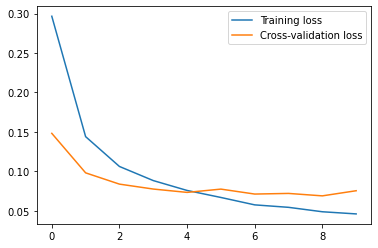

In [4]:
# Plot loss function values for both the the training- and test data sets
plt.plot(r.history['loss'], label='Training loss')
plt.plot(r.history['val_loss'], label='Cross-validation loss')
plt.legend()

In [5]:
# Estimate accuracy of the model with the test data set
print(f"Model accuracy with the test data: {model.evaluate(x_test, y_test)}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.9784
Model accuracy with the test data: [0.0753185972571373, 0.9783999919891357]


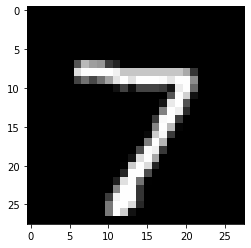

In [6]:
plt.imshow(x_test[0,:,:], cmap="gray")

In [7]:
pred_vector = model.predict(x_test[0:1,:]).flatten()
prediction = np.argmax(pred_vector)
likelihood = np.amax(pred_vector)
print(f"Predicted value: {prediction}")
print(f"Likelihood: {likelihood}")


Predicted value: 7
Likelihood: 0.9999850988388062


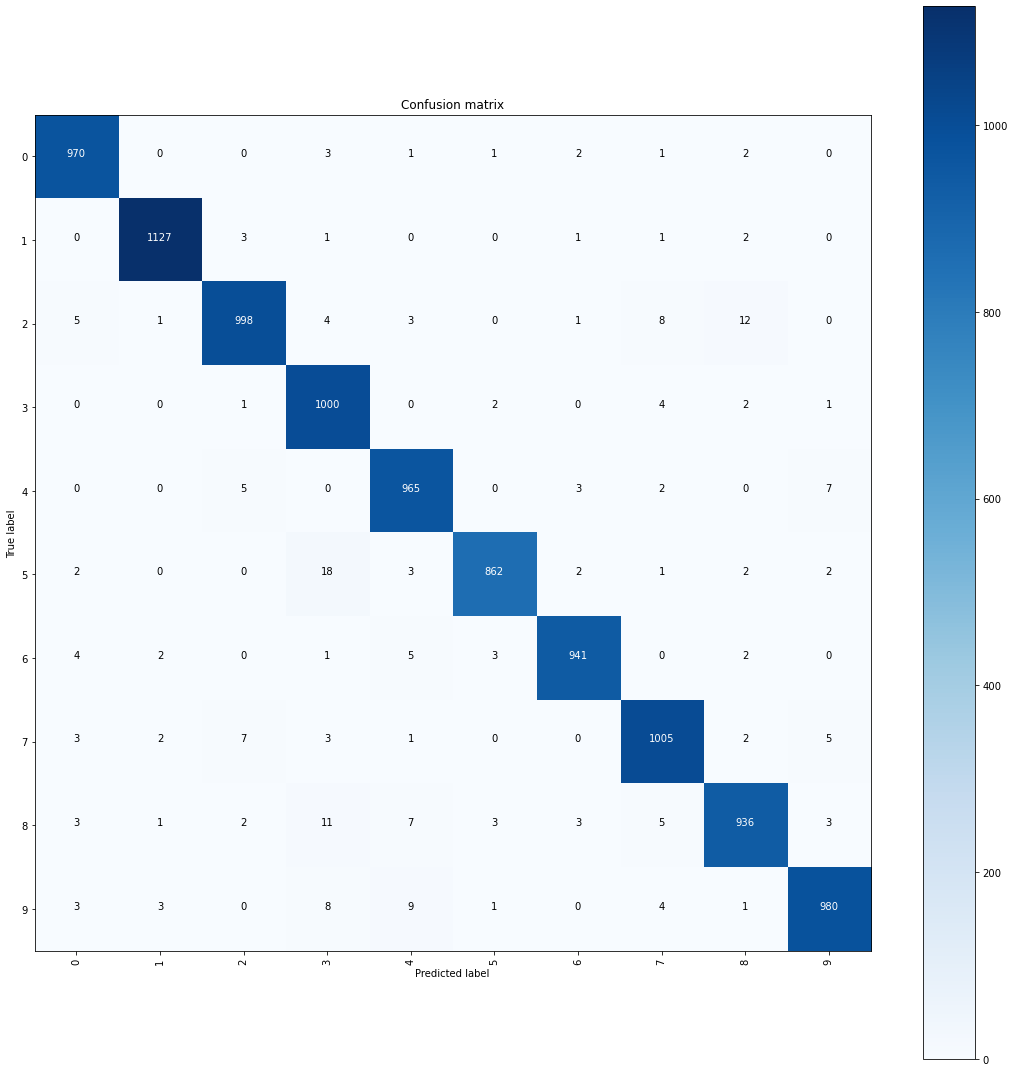

In [8]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
utils.plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 7 predicted: 2')

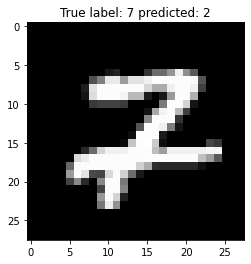

In [9]:
# Show misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {y_test[i]} predicted: {p_test[i]}")